<a href="https://colab.research.google.com/github/skillox1/PADSW06MDCD/blob/main/C%C3%B3pia_de_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Base de Dados Olist - Lista de Exercícios

In [4]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS


In [5]:
!pwd

/content


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Questões 1 a 8 - Quantas linhas temos em cada tabela?

In [9]:
zf = zipfile.ZipFile('/content/drive/MyDrive/archive.zip') 
df_orders = pd.read_csv(zf.open('olist_orders_dataset.csv'))
df_order_items = pd.read_csv(zf.open('olist_order_items_dataset.csv'))
df_customers = pd.read_csv(zf.open('olist_customers_dataset.csv'))
df_sellers = pd.read_csv(zf.open('olist_sellers_dataset.csv'))
df_products = pd.read_csv(zf.open('olist_products_dataset.csv'))
df_order_payments = pd.read_csv(zf.open('olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(zf.open('olist_order_reviews_dataset.csv'))
df_geolocation = pd.read_csv(zf.open('olist_geolocation_dataset.csv'))



In [10]:
dfs = [df_orders,df_order_items,df_customers,df_sellers,df_products,df_order_payments,df_order_reviews,df_geolocation]

In [11]:
for x in dfs:
  print(x.shape[0])

99441
112650
99441
3095
32951
103886
99224
1000163


In [12]:
datasets = [df_orders,df_order_items,df_customers,df_sellers,df_products,df_order_payments,df_order_reviews,df_geolocation]
titles = ["orders","items","customers","sellers","products","payments","reviews","geolocation"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Blues')

,dataset,no_of_columns,columns_name,no_of_rows
0,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
1,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
2,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
3,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
4,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
5,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
6,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
7,geolocation,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163


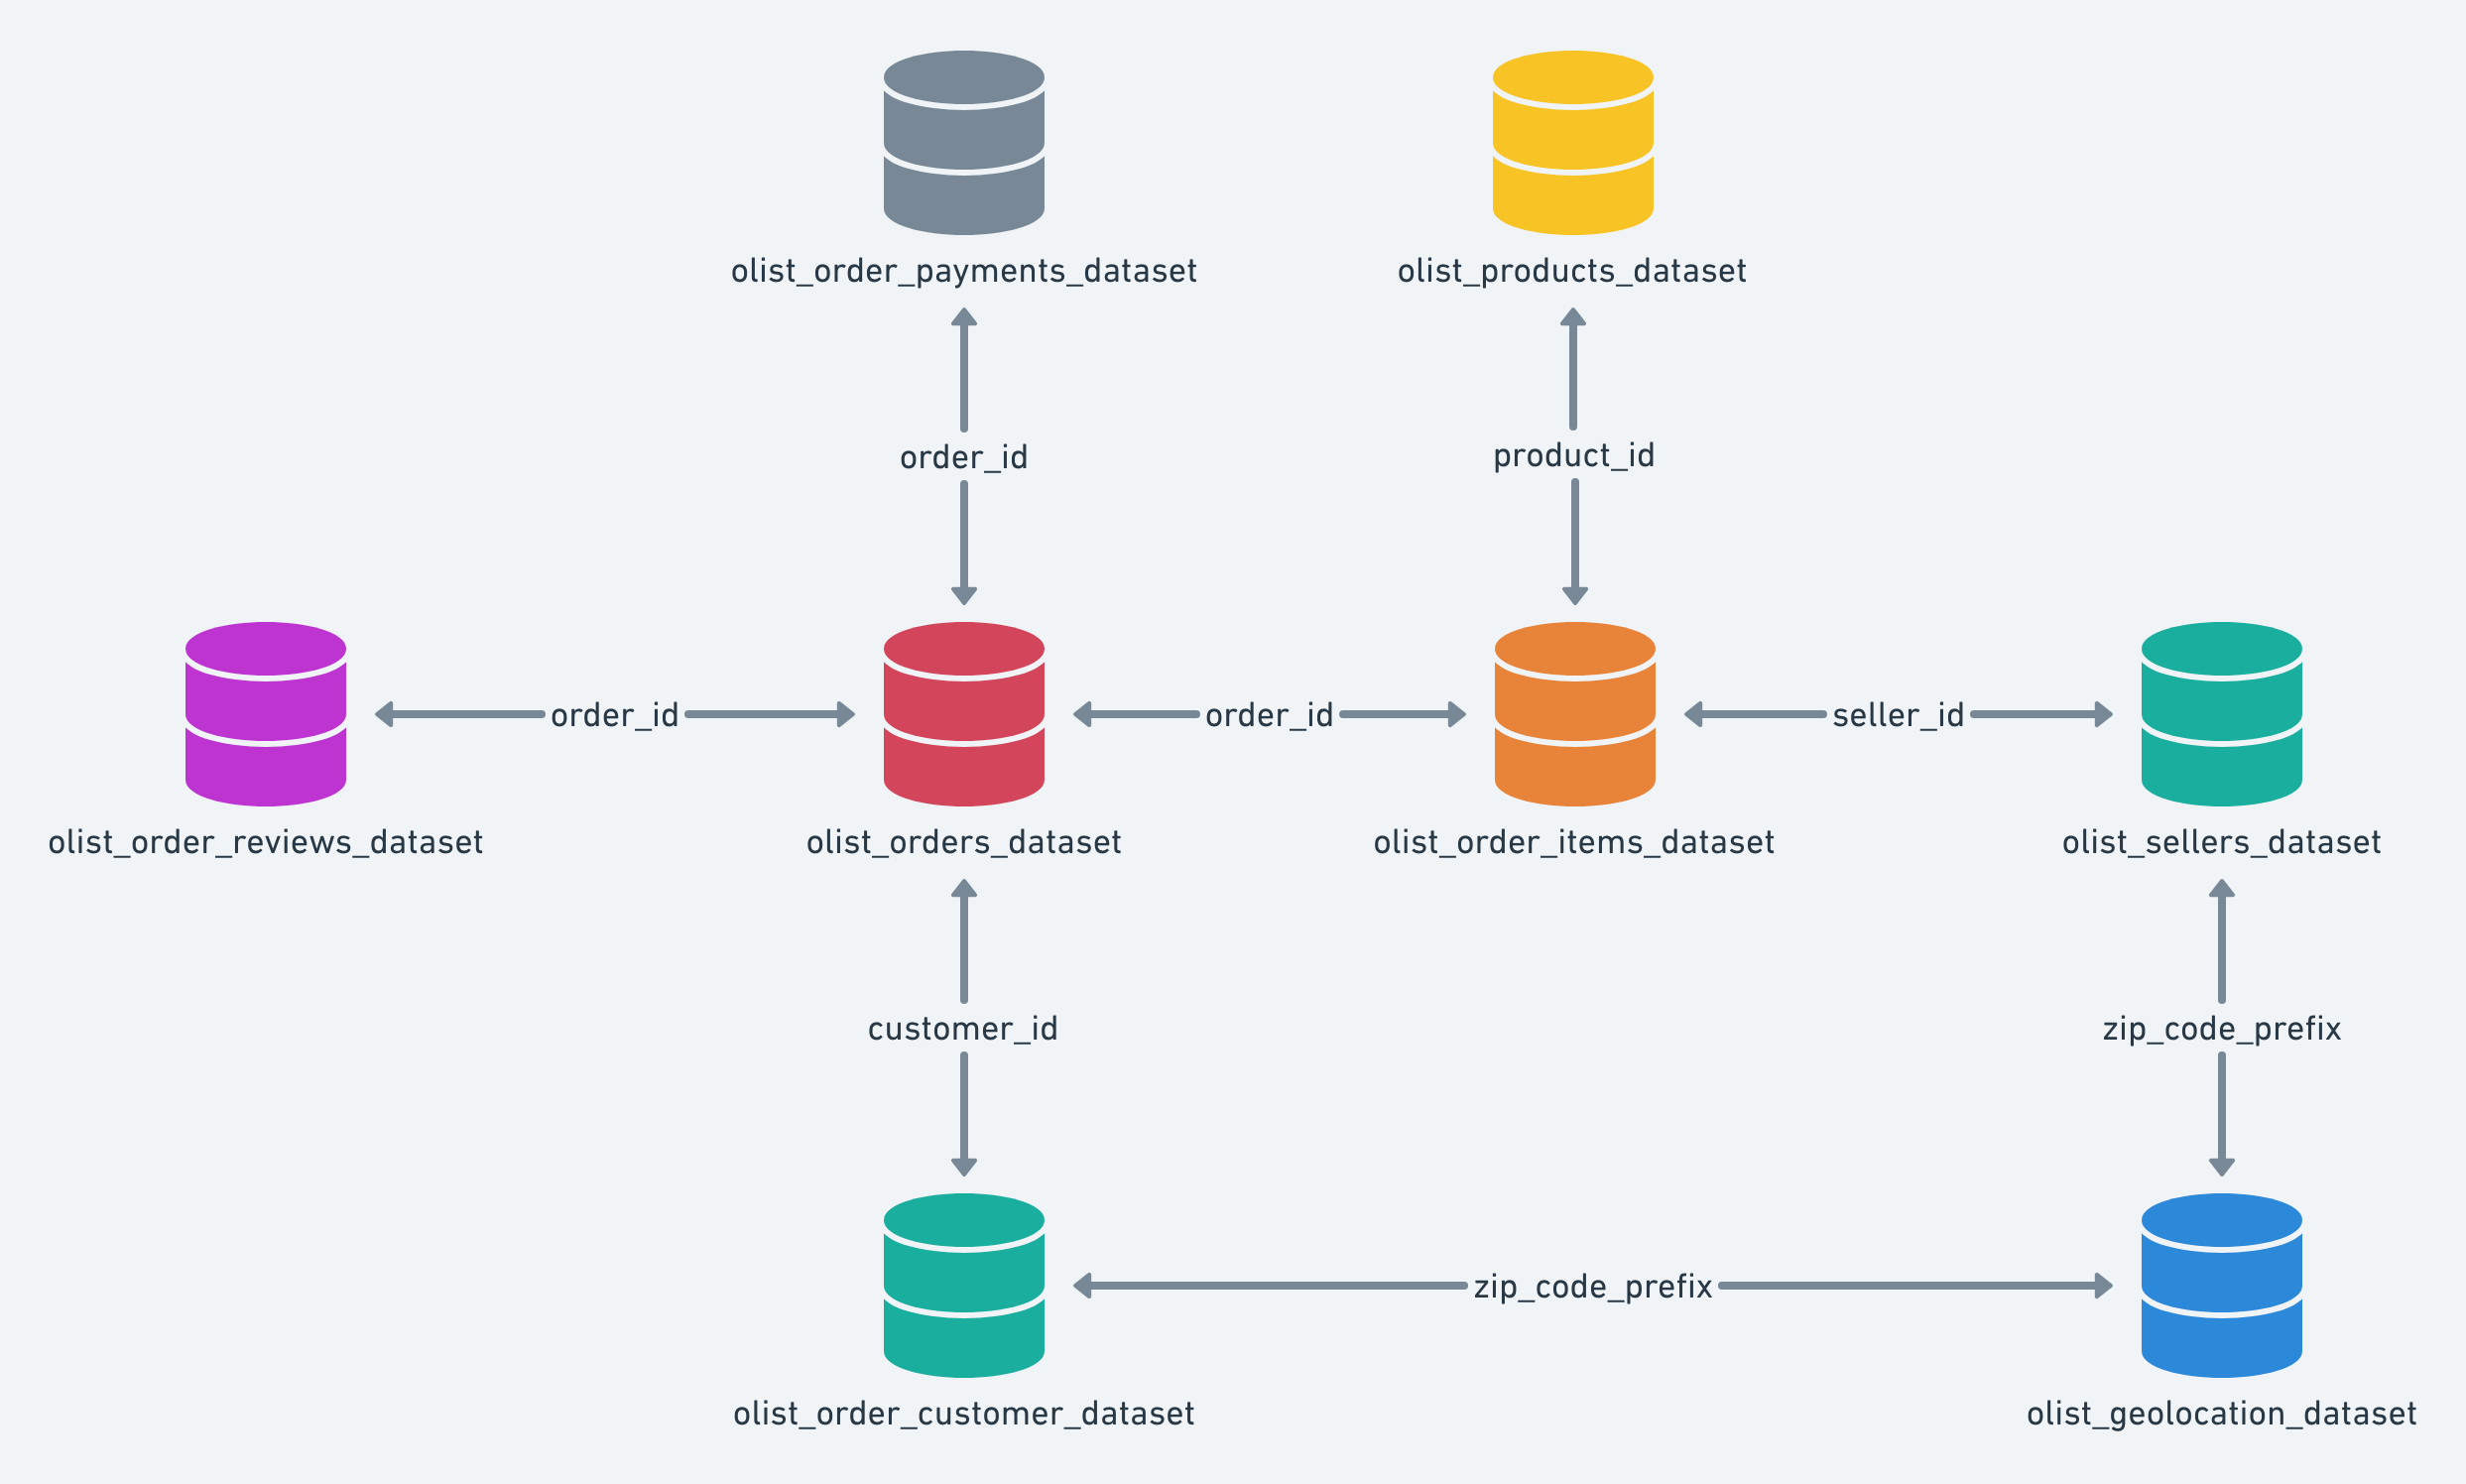

9 - Quantos Ceps únicos temos no banco de dados?

In [13]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
df_geolocation.geolocation_zip_code_prefix.nunique()

19015

10 - Quantas latitudes e longitudes estão expressas na base de dados?

In [15]:
df_geolocation.geolocation_lat.value_counts().sum()

1000163

In [16]:
df_geolocation.geolocation_lng.value_counts().sum()

1000163

11 - Crie um método para agrupar todas as diferentes latitudes e longitudes que um determinado CEP possui
para um valor único por CEP. Dica Use a função **group_by** e **aggregate**

In [17]:
df_geolocation = df_geolocation.rename(columns={"geolocation_zip_code_prefix":"zip_code"})

In [18]:
df_geolocation.groupby("zip_code").head()

,zip_code,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
999961,99960,-27.953858,-52.031943,charrua,RS
999996,99952,-28.182027,-51.880215,santa cecilia do sul,RS
1000008,99925,-27.936330,-52.425730,ipiranga do sul,RS
1000067,99965,-28.174697,-52.035508,agua santa,RS


In [19]:
df_geolocation.groupby("zip_code").agg({"geolocation_lat":["mean"],"geolocation_lng":["mean"]})
                                                           

,geolocation_lat,geolocation_lng
,mean,mean
zip_code,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99960,-27.953722,-52.025511
99965,-28.183372,-52.039850


In [20]:
df_geolocation = df_geolocation.groupby("zip_code").agg({"geolocation_lat":["mean"],"geolocation_lng":["mean"]}).drop_duplicates()
                                                          

In [21]:
print(df_geolocation.duplicated(keep=False).sum())

0


12 - Crie um método para agregar todas as tabelas disponíveis em uma única tabela

In [22]:
df_customers.rename(columns={"customer_zip_code_prefix": "zip_code"}, inplace=True)


In [23]:
olist = df_orders.merge(df_customers, on="customer_id").merge(df_geolocation, on="zip_code").merge(df_order_items, on="order_id").merge(df_products, on="product_id").merge\
      (df_order_payments, on="order_id").merge(df_sellers, on="seller_id").merge(df_order_reviews, on="order_id")
      
      

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  validate=validate,


In [24]:
olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,44.09,9350,maua,SP,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38
4,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36


13 -  Quantas ordens distintas temos em nosso banco de dados?

In [25]:
olist.order_id.nunique()

97642

14 - Quantos clientes distintos existem em nosso banco de dados?

In [26]:
olist.customer_id.nunique()

97642

15 - Quantos vendedores distintos existem em nosso bando de dados?

In [27]:
olist.seller_id.nunique()

3090

16 - Qual a porcentagem de vendas feitas com cartão de crédito?

In [28]:
olist.payment_type.value_counts()

credit_card    86281
boleto         22770
voucher         6267
debit_card      1691
Name: payment_type, dtype: int64

In [29]:
olist.payment_type.value_counts().loc["credit_card"]/olist.payment_type.value_counts().sum()

0.7373877223119589

17 - Qual a porcentagem de vendas feitas com cartão de débito?

In [30]:
olist.payment_type.value_counts().loc["debit_card"]/olist.payment_type.value_counts().sum()

0.014451879769932228

18 - Qual a porcentagem de reviews menor do que 2 estrelas temos em nossa base?

In [31]:
olist.review_score.value_counts()

5    66085
4    22224
1    14809
3     9818
2     4073
Name: review_score, dtype: int64

In [32]:
olist.review_score.value_counts().loc[1]/olist.review_score.value_counts().sum()

0.1265629139638831

19 - Quantas categorias de produto distintas existem em nossa base?

In [33]:
olist.product_category_name.nunique()

73

20 - Qual a média de scores por categoria de produto?

In [34]:
olist.groupby("product_category_name").agg({"review_score":["mean"]})

,review_score
,mean
product_category_name,
agro_industria_e_comercio,4.150794
alimentos,4.228346
alimentos_bebidas,4.324138
artes,3.935484
artes_e_artesanato,4.125000
...,...
sinalizacao_e_seguranca,4.040816
tablets_impressao_imagem,4.117647


21 - Quais as 5 categorias que mais possuem produtos em nossa base?

In [35]:
olist.product_category_name.value_counts()

cama_mesa_banho                                  11819
beleza_saude                                      9914
esporte_lazer                                     8925
moveis_decoracao                                  8725
informatica_acessorios                            8071
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: product_category_name, Length: 73, dtype: int64

22 - Quantos comentários existem na base?

In [36]:
olist.review_comment_message.count()

49549

In [ ]:
olist.review_comment_message.isna().sum()

67460

In [37]:
olist.shape[0]

117009

23 - Crie uma nuvem de palavras que mostre as principais informações contidas nos comentários.

In [38]:
to_cloud = olist.copy()


In [39]:
to_cloud['review_comment_message'] = to_cloud['review_comment_message'].astype(str)
to_cloud = to_cloud.dropna(subset=['review_comment_message'])
to_cloud = to_cloud[to_cloud['review_comment_message'] != 'nan']

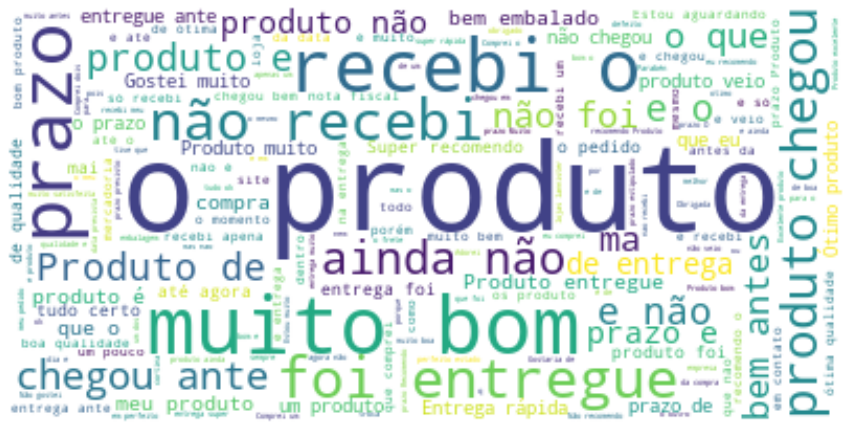

In [40]:
text = " ".join(to_cloud['review_comment_message'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

24 - Qual a porcentagem de ordens entregues?

In [41]:
olist.order_status.value_counts()

delivered      114553
shipped          1160
canceled          548
invoiced          369
processing        369
unavailable         7
approved            3
Name: order_status, dtype: int64

In [42]:
olist.order_status.value_counts().loc["delivered"]/olist.order_status.value_counts().sum()

0.9790101616115

25 - Qual o tempo médio entre a compra e a aprovação da compra?

In [44]:
olist.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117009 entries, 0 to 117008
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117009 non-null  object 
 1   customer_id                    117009 non-null  object 
 2   order_status                   117009 non-null  object 
 3   order_purchase_timestamp       117009 non-null  object 
 4   order_approved_at              116994 non-null  object 
 5   order_delivered_carrier_date   115781 non-null  object 
 6   order_delivered_customer_date  114552 non-null  object 
 7   order_estimated_delivery_date  117009 non-null  object 
 8   customer_unique_id             117009 non-null  object 
 9   zip_code                       117009 non-null  int64  
 10  customer_city                  117009 non-null  object 
 11  customer_state                 117009 non-null  object 
 12  (geolocation_lat, mean)       

In [49]:
cols = olist.columns[3:8]

In [50]:
cols

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [54]:
olist[cols] = olist[cols].apply(pd.to_datetime, errors = "coerce")

In [55]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117009 entries, 0 to 117008
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117009 non-null  object        
 1   customer_id                    117009 non-null  object        
 2   order_status                   117009 non-null  object        
 3   order_purchase_timestamp       117009 non-null  datetime64[ns]
 4   order_approved_at              116994 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115781 non-null  datetime64[ns]
 6   order_delivered_customer_date  114552 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117009 non-null  datetime64[ns]
 8   customer_unique_id             117009 non-null  object        
 9   zip_code                       117009 non-null  int64         
 10  customer_city                  117009 non-null  object        
 11  

In [56]:
olist["delta_approval"] = olist.order_approved_at - olist.order_purchase_timestamp

In [57]:
olist.delta_approval.mean()

Timedelta('0 days 10:29:48.026881720')

In [58]:
olist.delta_approval.describe()

count                       116994
mean     0 days 10:29:48.026881720
std      0 days 22:13:52.682657296
min                0 days 00:00:00
25%                0 days 00:12:56
50%                0 days 00:20:48
75%         0 days 14:59:16.500000
max               60 days 10:51:59
Name: delta_approval, dtype: object